In [169]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [170]:
#import the data set
data=pd.read_csv('HCV-Egy-Data.csv')

In [171]:
#looking at the first five datapoint
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [172]:
#Explore Data
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [173]:
#Rename Columns
data.columns=['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting','Headache ',
       'Diarrhea','Fatigue','Jaundice',
       'Epigastric_pain ', 'WBC','RBC','HGB', 'Plat','AST_1','ALT_1',
       'ALT_4', 'ALT_12','ALT_24','ALT_36','ALT_48','ALT_after_24w',
       'RNA_Base','RNA_4','RNA_12', 'RNA_EOT','RNA_EF',
       'Baseline_histological_Grading','Baselinehistological_staging']

In [174]:
data.columns = data.columns.str.strip()

In [175]:
# Checking data types and non null data for each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            1385 non-null   int64
 1   Gender                         1385 non-null   int64
 2   BMI                            1385 non-null   int64
 3   Fever                          1385 non-null   int64
 4   Nausea/Vomting                 1385 non-null   int64
 5   Headache                       1385 non-null   int64
 6   Diarrhea                       1385 non-null   int64
 7   Fatigue                        1385 non-null   int64
 8   Jaundice                       1385 non-null   int64
 9   Epigastric_pain                1385 non-null   int64
 10  WBC                            1385 non-null   int64
 11  RBC                            1385 non-null   int64
 12  HGB                            1385 non-null   int64
 13  Plat              

In [176]:
#look at the five number of data
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [177]:
#Checking if any data is null
data.isnull().sum().sum()

0

In [178]:
#Change the classes columns to categorical for better visualization 

#categorize columns: Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice, se[]
data_cat=data[['Gender','Fever','Nausea/Vomting','Headache','Fatigue','Jaundice','Diarrhea','Epigastric_pain',"Baselinehistological_staging"]] 

In [179]:
#Check the first five varible of the new cagetory data
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue,Jaundice,Diarrhea,Epigastric_pain,Baselinehistological_staging
0,1,2,1,1,2,2,1,2,2
1,1,1,2,2,2,2,1,1,2
2,1,2,2,2,1,1,2,1,4
3,2,1,2,1,1,2,2,1,3
4,1,1,1,2,2,2,1,2,1


In [180]:
#Change all the datatype in the cagetory table into cagetory instead of interger
data_cat=data_cat.astype('category')

In [181]:

data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        1385 non-null   category
 1   Fever                         1385 non-null   category
 2   Nausea/Vomting                1385 non-null   category
 3   Headache                      1385 non-null   category
 4   Fatigue                       1385 non-null   category
 5   Jaundice                      1385 non-null   category
 6   Diarrhea                      1385 non-null   category
 7   Epigastric_pain               1385 non-null   category
 8   Baselinehistological_staging  1385 non-null   category
dtypes: category(9)
memory usage: 13.2 KB


In [182]:
#Replacing the values to names e.g. 1:Male,2:Female 1:Absent,2:present 
data_cat['Gender'].replace([1,2],['Male','Female'],inplace=True)
data_cat['Gender']

0         Male
1         Male
2         Male
3       Female
4         Male
         ...  
1380      Male
1381      Male
1382      Male
1383      Male
1384    Female
Name: Gender, Length: 1385, dtype: object

In [183]:
#check for the unique values for the other columns(Symptoms):
Symptoms_cols=data_cat[["Fever","Nausea/Vomting","Headache","Fatigue","Jaundice","Diarrhea",'Epigastric_pain']]

Symptoms_cols_values = data_cat[["Fever","Nausea/Vomting","Headache","Fatigue","Jaundice","Diarrhea",'Epigastric_pain']].values
unique_values =  np.unique(Symptoms_cols_values)

print(unique_values)

[1 2]


In [184]:
#Replacing values (1-2) to (Absent,Present) in Symptoms Features:

data_cat['Fever'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Nausea/Vomting'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Headache'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Fatigue'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Jaundice'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Diarrhea'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Epigastric_pain'].replace([1,2],['Absent','Present'],inplace=True)

In [185]:
data_cat['Baselinehistological_staging'].unique()

[2, 4, 3, 1]
Categories (4, int64): [2, 4, 3, 1]

In [186]:
data_cat['Baselinehistological_staging'].replace([0,1,2,3,4],['No Fibrosis','Portal Fibrosis','Few Septa','Many Septa','Cirrhosis'],inplace=True)

In [187]:
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue,Jaundice,Diarrhea,Epigastric_pain,Baselinehistological_staging
0,Male,Present,Absent,Absent,Present,Present,Absent,Present,Few Septa
1,Male,Absent,Present,Present,Present,Present,Absent,Absent,Few Septa
2,Male,Present,Present,Present,Absent,Absent,Present,Absent,Cirrhosis
3,Female,Absent,Present,Absent,Absent,Present,Present,Absent,Many Septa
4,Male,Absent,Absent,Present,Present,Present,Absent,Present,Portal Fibrosis



--------Gender------------
['Male' 'Female']


Male      707
Female    678
Name: Gender, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


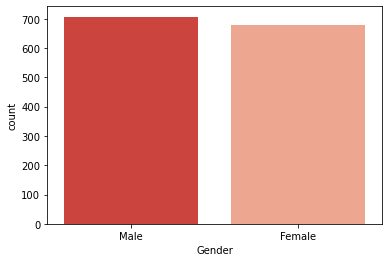

In [188]:
print('\n--------Gender------------')
print(data_cat['Gender'].unique())
print('\n')
print(data_cat['Gender'].value_counts())
sns.countplot(data_cat['Gender'],palette="Reds_r")
plt.show()


--------Baselinehistological_staging------------
['Few Septa' 'Cirrhosis' 'Many Septa' 'Portal Fibrosis']


Cirrhosis          362
Many Septa         355
Portal Fibrosis    336
Few Septa          332
Name: Baselinehistological_staging, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


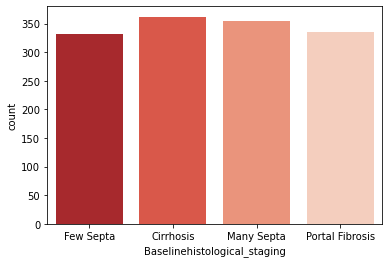

In [189]:
print('\n--------Baselinehistological_staging------------')
print(data_cat['Baselinehistological_staging'].unique())
print('\n')
print(data_cat['Baselinehistological_staging'].value_counts())
sns.countplot(data_cat['Baselinehistological_staging'],palette="Reds_r")
plt.show()

In [190]:
ALTdata=data[['ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36','ALT_48', 'ALT_after_24w']]
ALTdata

,ALT_1,ALT_4,ALT_12,ALT_24,ALT_36,ALT_48,ALT_after_24w
0,84,52,109,81,5,5,5
1,123,95,75,113,57,123,44
2,49,95,107,116,5,5,5
3,64,109,80,88,48,77,33
4,104,67,48,120,94,90,30
...,...,...,...,...,...,...,...
1380,59,78,106,127,63,44,45
1381,102,65,99,108,97,64,41
1382,93,123,61,116,87,39,24
1383,97,104,74,47,48,81,43


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

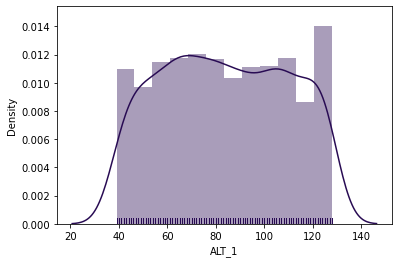

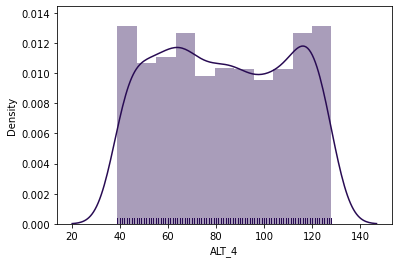

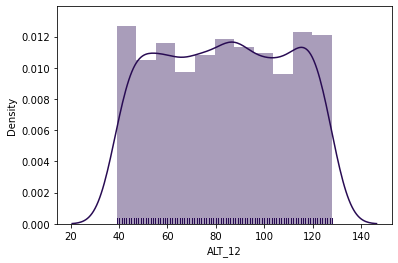

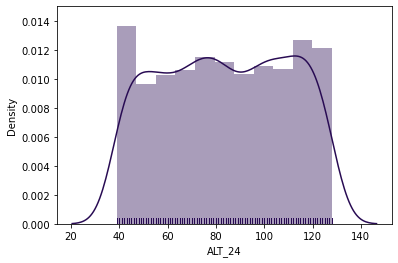

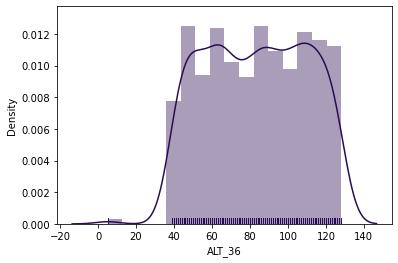

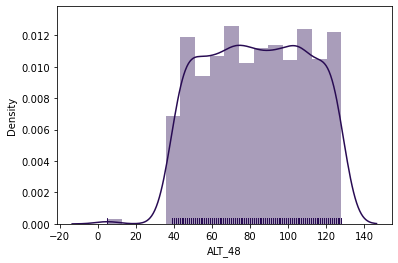

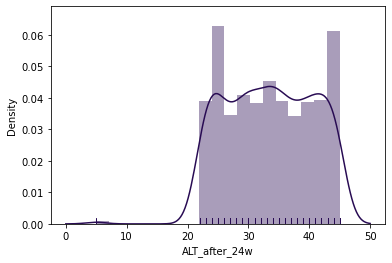

In [191]:
#ALT Enzyme distribution across each week
sns.set_palette(palette="inferno")

for i, col in enumerate(ALTdata.columns):
    plt.figure(i)
    sns.distplot(ALTdata[col],rug=True)

In [192]:
data_num=data[['Age','BMI','WBC','RBC','HGB','Plat','AST_1','ALT_1','ALT_4','ALT_12','ALT_24','ALT_36','ALT_48','ALT_after_24w','RNA_Base','RNA_4','RNA_12','ALT_24','RNA_EOT','RNA_EF','Baseline_histological_Grading','Baselinehistological_staging']] 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

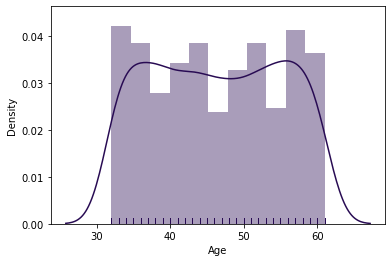

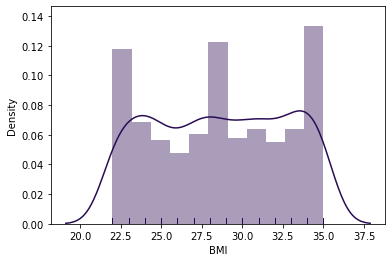

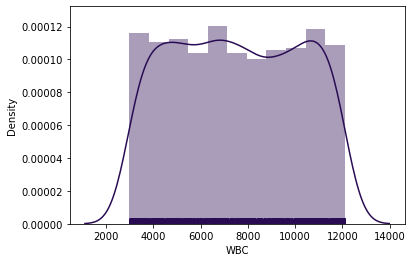

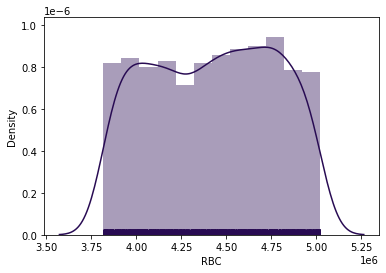

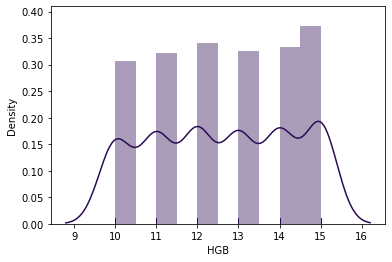

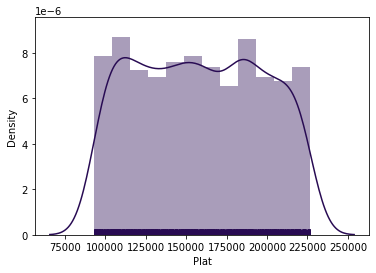

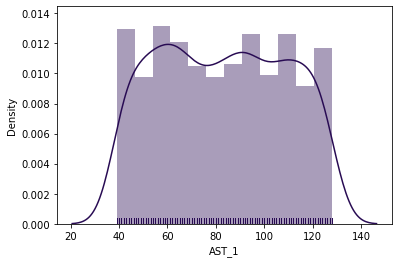

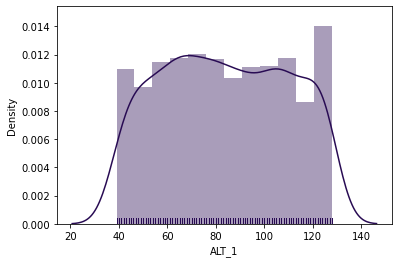

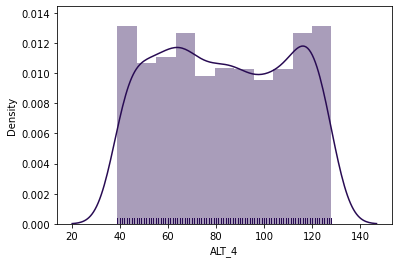

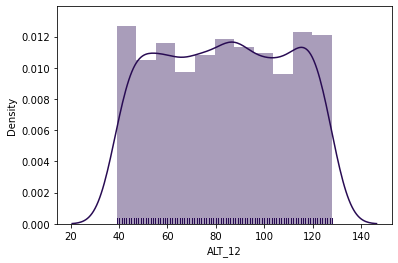

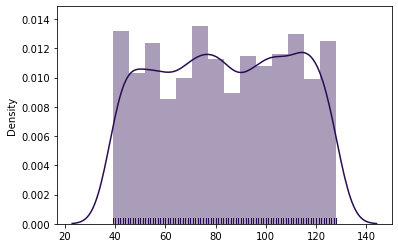

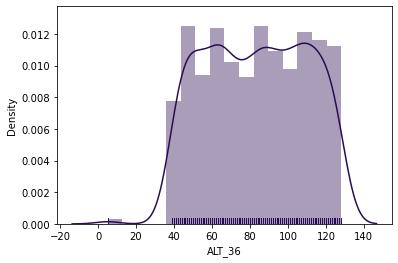

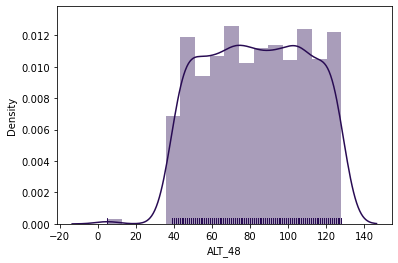

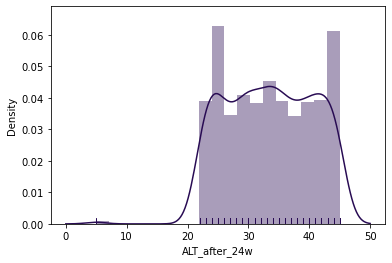

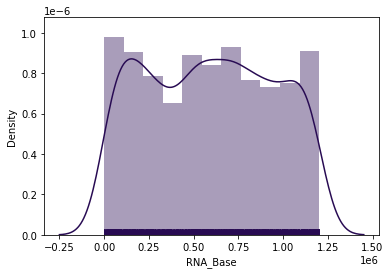

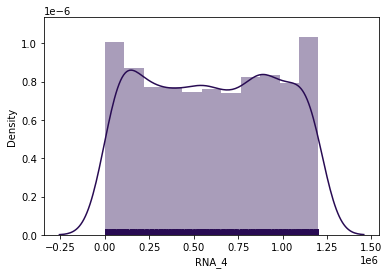

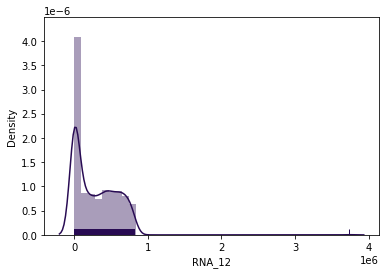

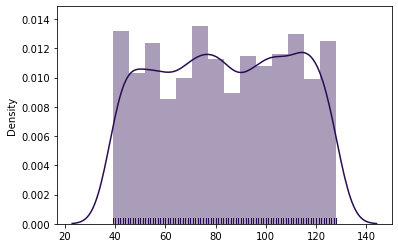

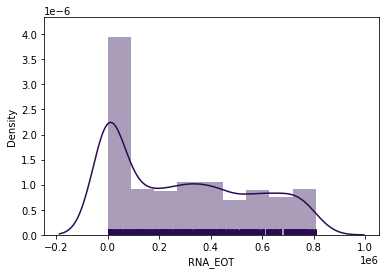

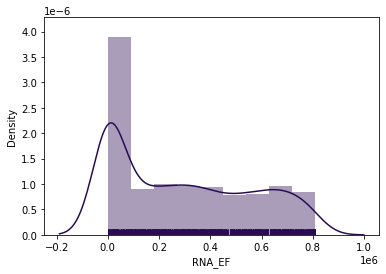

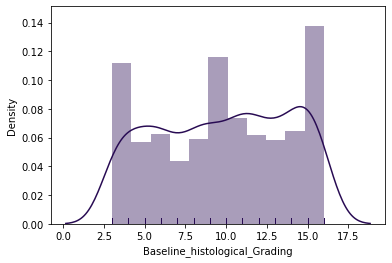

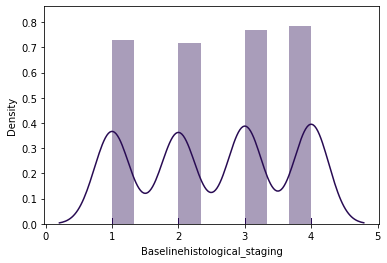

In [193]:
#ALT Enzyme distribution across each week
sns.set_palette(palette="inferno")

for i, col in enumerate(data_num.columns):
    plt.figure(i)
    sns.distplot(data_num[col],rug=True)

In [194]:
 from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 10),  copy=True)
x_scaled = min_max_scaler.fit_transform(data_num)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,8.275862,10.000000,4.867179,3.597126,8.0,1.432661,6.741573,5.056180,1.460674,7.865169,...,0.000000,0.00,5.456104,5.280234,0.772310,4.719101,0.000000,0.000000,7.692308,3.333333
1,4.827586,5.384615,10.000000,5.099736,0.0,2.724146,5.842697,9.438202,6.292135,4.044944,...,9.593496,9.75,0.338105,4.482196,1.707215,8.314607,4.166010,0.383548,0.769231,3.333333
2,8.620690,8.461538,1.302964,6.695088,4.0,4.384306,8.314607,1.123596,6.292135,7.640449,...,0.000000,0.00,4.755215,5.503333,0.000000,8.651685,9.103155,6.896269,0.769231,10.000000
3,5.862069,8.461538,3.840834,8.137982,0.0,4.004766,0.449438,2.808989,7.865169,4.606742,...,5.853659,7.00,8.674979,3.744115,1.569555,5.505618,9.208518,7.185930,5.384615,6.666667
4,9.310345,7.692308,0.735456,6.571830,2.0,7.094064,6.741573,7.303371,3.146067,1.011236,...,6.910569,6.25,5.498399,6.147498,10.000000,9.101124,4.192505,2.997009,6.153846,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,4.137931,5.384615,4.448957,9.490220,10.0,8.205783,9.325843,2.247191,4.382022,7.528090,...,3.170732,10.00,3.228641,0.465445,0.000000,9.887640,0.000000,0.000000,9.230769,10.000000
1381,7.931034,9.230769,3.530187,6.826200,0.0,1.705720,10.000000,7.078652,2.921348,6.741573,...,4.796748,9.00,4.007801,1.272820,1.054085,7.752809,0.910006,2.915708,5.384615,3.333333
1382,3.448276,3.076923,2.109769,2.542501,8.0,2.648238,2.471910,6.067416,9.438202,2.471910,...,2.764228,4.75,5.100872,4.766133,2.160255,8.651685,4.251545,1.980087,2.307692,3.333333
1383,6.896552,5.384615,4.682766,3.540414,0.0,8.459659,3.483146,6.516854,7.303371,3.932584,...,6.178862,9.50,1.164465,0.633730,1.382077,0.898876,0.030367,8.589966,9.230769,6.666667


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1385 non-null   float64
 1   1       1385 non-null   float64
 2   2       1385 non-null   float64
 3   3       1385 non-null   float64
 4   4       1385 non-null   float64
 5   5       1385 non-null   float64
 6   6       1385 non-null   float64
 7   7       1385 non-null   float64
 8   8       1385 non-null   float64
 9   9       1385 non-null   float64
 10  10      1385 non-null   float64
 11  11      1385 non-null   float64
 12  12      1385 non-null   float64
 13  13      1385 non-null   float64
 14  14      1385 non-null   float64
 15  15      1385 non-null   float64
 16  16      1385 non-null   float64
 17  17      1385 non-null   float64
 18  18      1385 non-null   float64
 19  19      1385 non-null   float64
 20  20      1385 non-null   float64
 21  21      1385 non-null   float64
dtype

In [196]:
df.columns=['Age','BMI','WBC','RBC','HGB','Plat','AST_1','ALT_1','ALT_4','ALT_12','ALT_24','ALT_36','ALT_48','ALT_after_24w','RNA_Base','RNA_4','RNA_12','ALT_24','RNA_EOT','RNA_EF','Baseline_histological_Grading','Baselinehistological_staging']

In [197]:
df["Baselinehistological_staging"] = data["Baselinehistological_staging"]

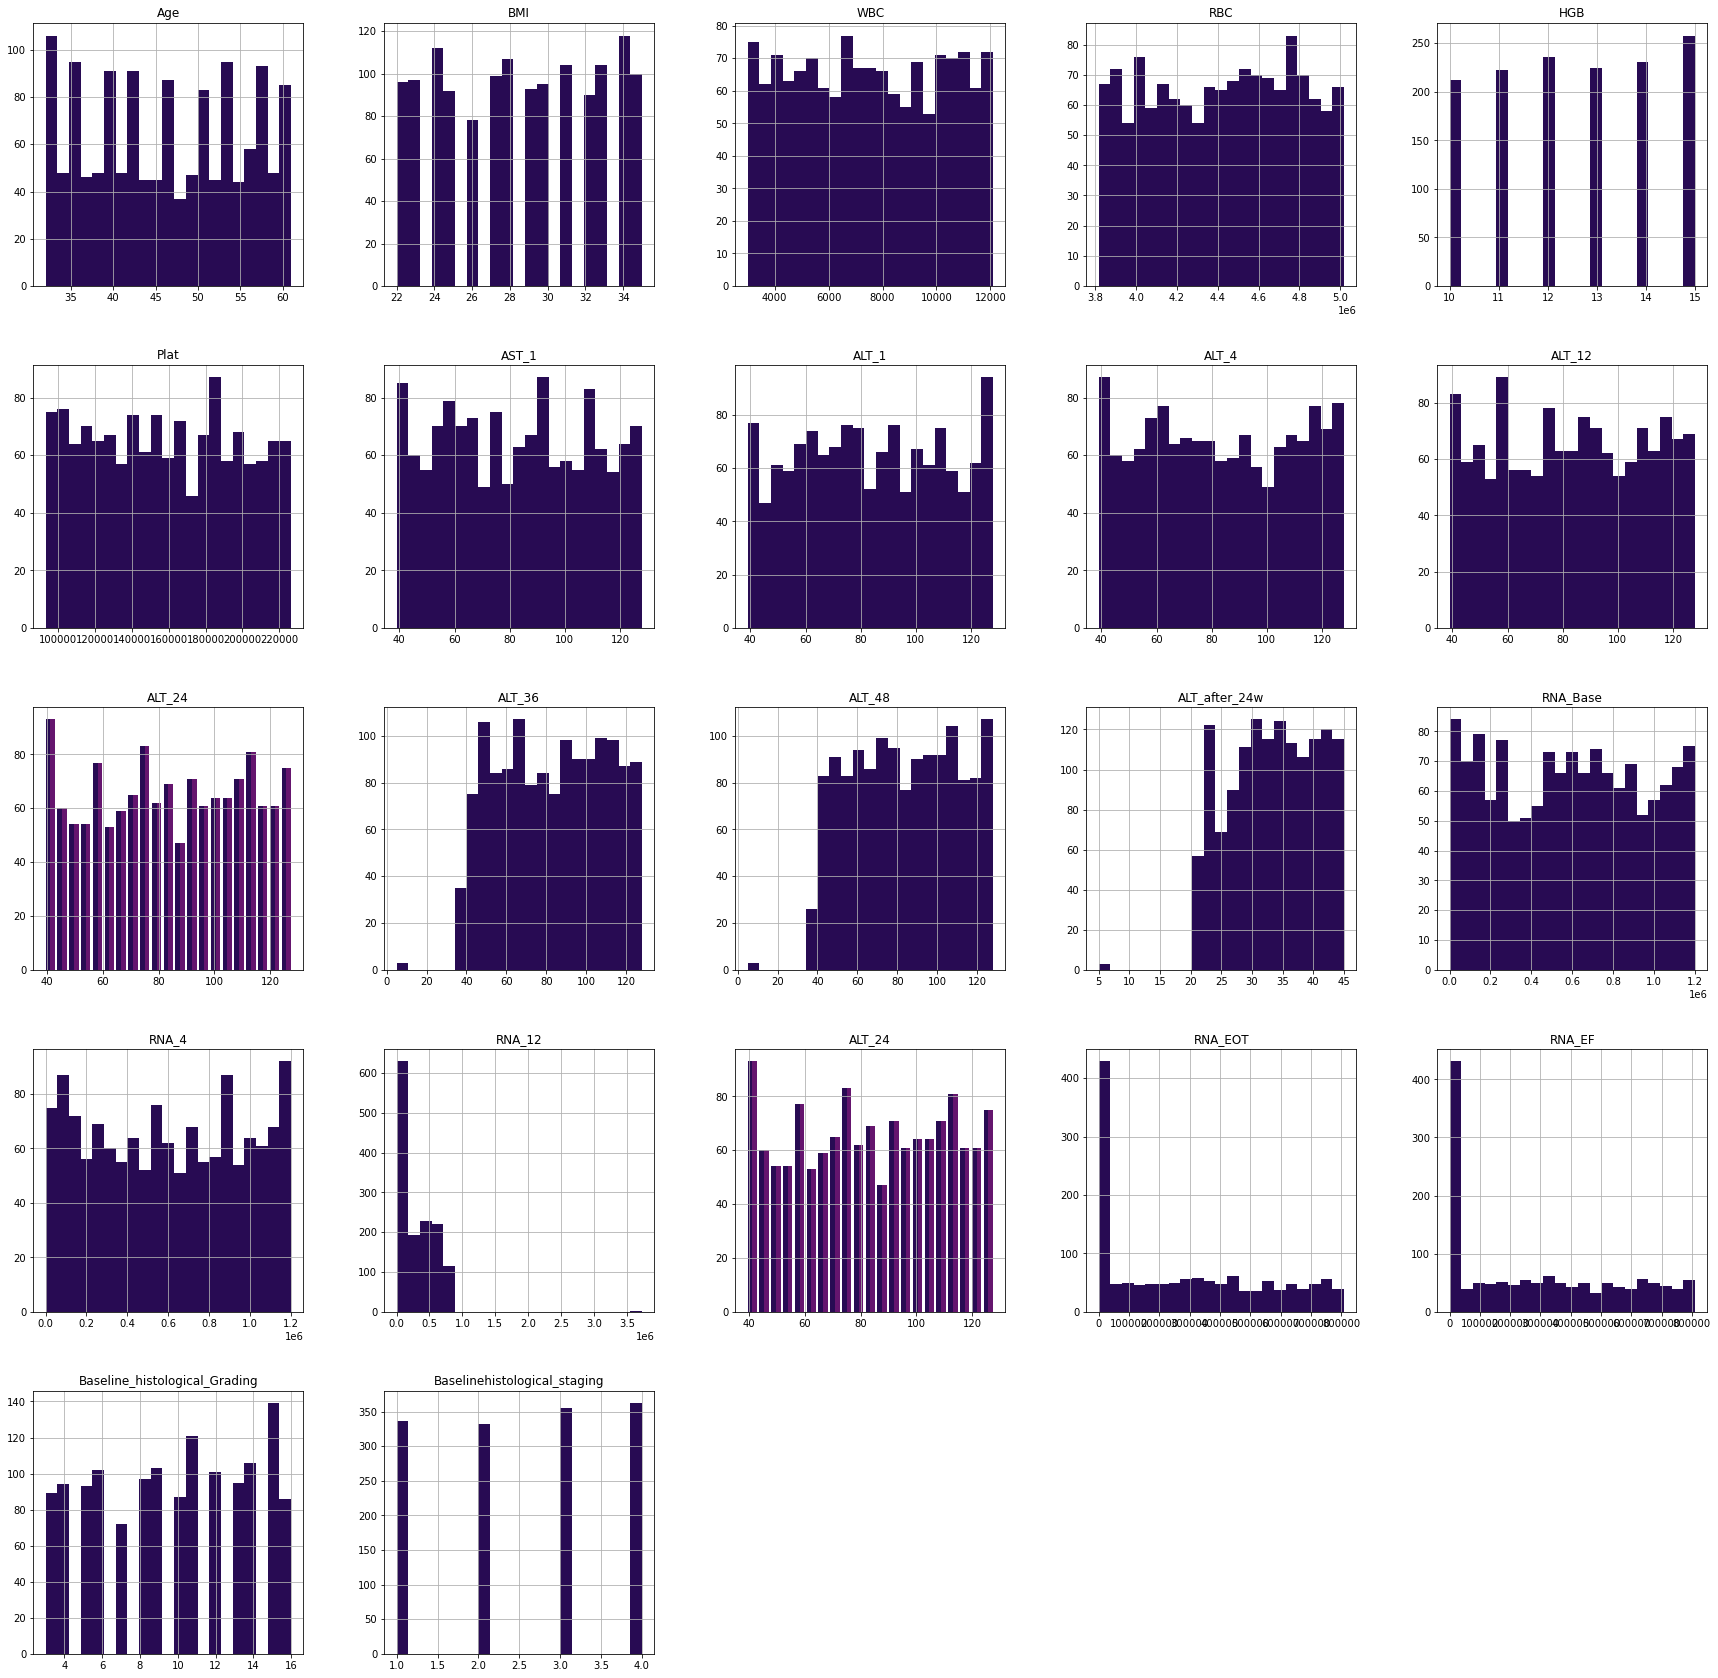

In [198]:
data_num.hist( sharex=False, sharey=False, figsize=(30, 30), bins=21)
plt.show()

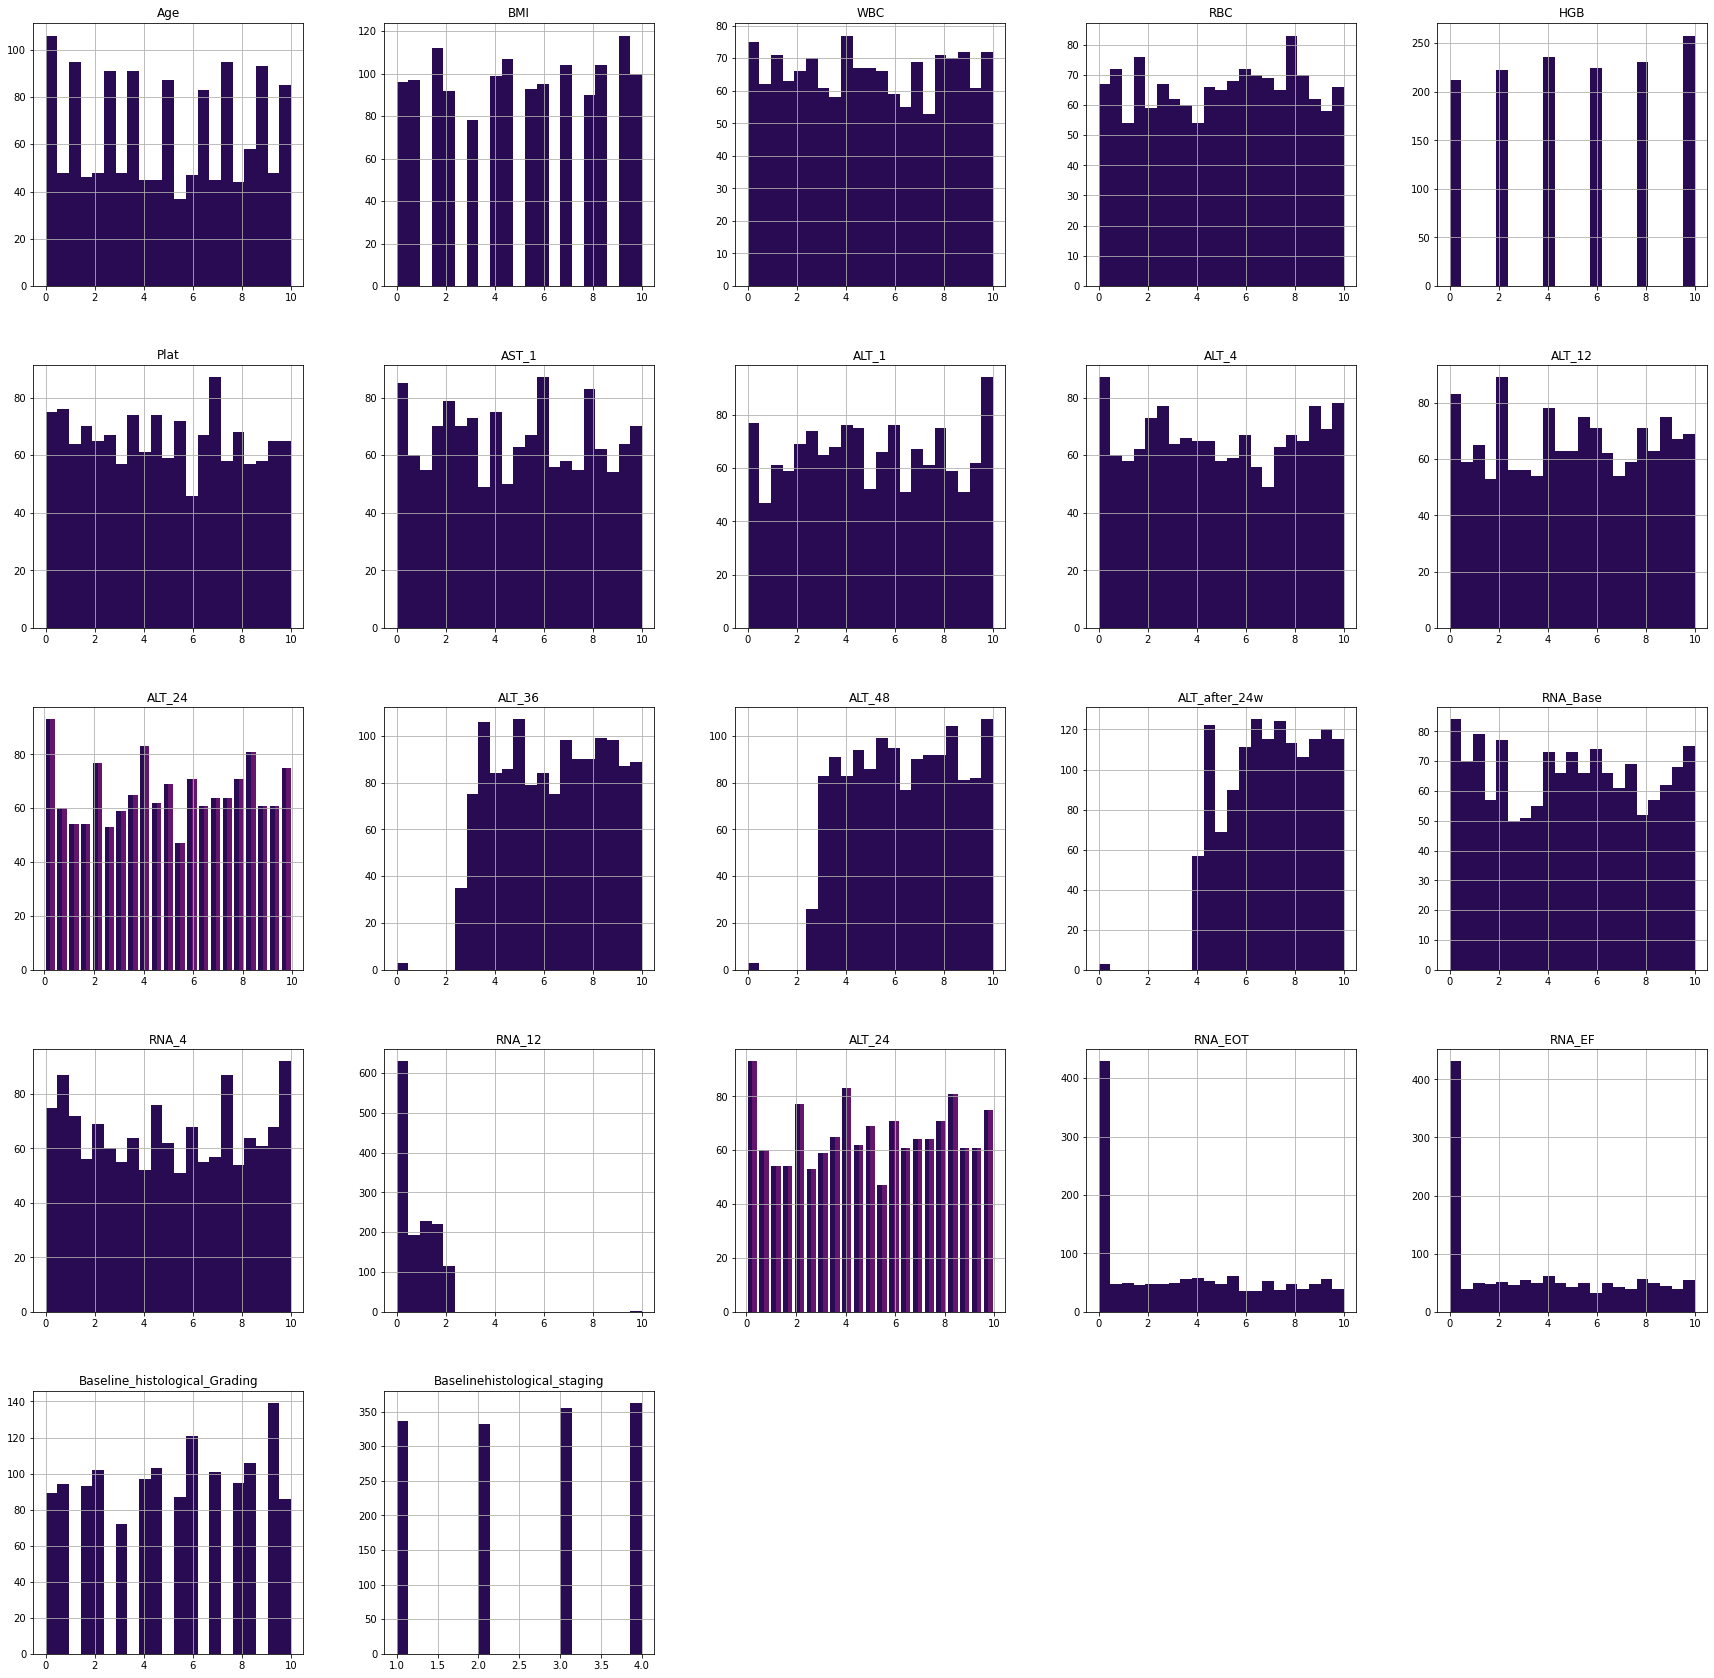

In [199]:
df.hist( sharex=False, sharey=False, figsize=(30, 30), bins=21)
plt.show()

In [200]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            1385 non-null   int64
 1   BMI                            1385 non-null   int64
 2   WBC                            1385 non-null   int64
 3   RBC                            1385 non-null   int64
 4   HGB                            1385 non-null   int64
 5   Plat                           1385 non-null   int64
 6   AST_1                          1385 non-null   int64
 7   ALT_1                          1385 non-null   int64
 8   ALT_4                          1385 non-null   int64
 9   ALT_12                         1385 non-null   int64
 10  ALT_24                         1385 non-null   int64
 11  ALT_36                         1385 non-null   int64
 12  ALT_48                         1385 non-null   int64
 13  ALT_after_24w     

In [201]:
print(data_num.info())
print('-------------------------------------------------------------------------------------')
print(data_num.head(10))
print('-------------------------------------------------------------------------------------')
print(data_num.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            1385 non-null   int64
 1   BMI                            1385 non-null   int64
 2   WBC                            1385 non-null   int64
 3   RBC                            1385 non-null   int64
 4   HGB                            1385 non-null   int64
 5   Plat                           1385 non-null   int64
 6   AST_1                          1385 non-null   int64
 7   ALT_1                          1385 non-null   int64
 8   ALT_4                          1385 non-null   int64
 9   ALT_12                         1385 non-null   int64
 10  ALT_24                         1385 non-null   int64
 11  ALT_36                         1385 non-null   int64
 12  ALT_48                         1385 non-null   int64
 13  ALT_after_24w     

In [202]:
from scipy.stats import chi2_contingency
print("-------------------Gender-----------------------")
data_crosstab = pd.crosstab(data_cat['Gender'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 

chi2_contingency(data_crosstab)

-------------------Gender-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Gender                                                           
Female                              172        149         193   
Male                                190        183         162   

Baselinehistological_staging  Portal Fibrosis  
Gender                                         
Female                                    164  
Male                                      172  


(6.6701779429734325,
 0.08318737457020542,
 3,
 array([[177.2101083 , 162.52418773, 173.7833935 , 164.48231047],
        [184.7898917 , 169.47581227, 181.2166065 , 171.51768953]]))

In [203]:
print("-------------------Fever-----------------------")
data_crosstab = pd.crosstab(data_cat['Fever'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Fever-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Fever                                                            
Absent                              187        160         167   
Present                             175        172         188   

Baselinehistological_staging  Portal Fibrosis  
Fever                                          
Absent                                    157  
Present                                   179  


(2.1813392750630047,
 0.5356332988397037,
 3,
 array([[175.38050542, 160.84620939, 171.98916968, 162.78411552],
        [186.61949458, 171.15379061, 183.01083032, 173.21588448]]))

In [204]:
print("-------------------Nausea/Vomting-----------------------")
data_crosstab = pd.crosstab(data_cat['Nausea/Vomting'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Nausea/Vomting-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Nausea/Vomting                                                   
Absent                              171        173         165   
Present                             191        159         190   

Baselinehistological_staging  Portal Fibrosis  
Nausea/Vomting                                 
Absent                                    180  
Present                                   156  


(5.134935023753313,
 0.16217902183179256,
 3,
 array([[180.08519856, 165.16101083, 176.60288809, 167.15090253],
        [181.91480144, 166.83898917, 178.39711191, 168.84909747]]))

In [205]:
print("-------------------Headache-----------------------")
data_crosstab = pd.crosstab(data_cat['Headache'], 
data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Headache-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Headache                                                         
Absent                              181        169         181   
Present                             181        163         174   

Baselinehistological_staging  Portal Fibrosis  
Headache                                       
Absent                                    167  
Present                                   169  


(0.1710128322638514,
 0.9821273061728452,
 3,
 array([[182.43754513, 167.31841155, 178.90974729, 169.33429603],
        [179.56245487, 164.68158845, 176.09025271, 166.66570397]]))

In [206]:
print("-------------------Fatigue-----------------------")
data_crosstab = pd.crosstab(data_cat['Fatigue'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Fatigue-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Fatigue                                                          
Absent                              176        159         184   
Present                             186        173         171   

Baselinehistological_staging  Portal Fibrosis  
Fatigue                                        
Absent                                    175  
Present                                   161  


(1.9195050221270935,
 0.589280639706306,
 3,
 array([[181.39205776, 166.35956679, 177.88447653, 168.36389892],
        [180.60794224, 165.64043321, 177.11552347, 167.63610108]]))

In [207]:
print("-------------------Jaundice-----------------------")
data_crosstab = pd.crosstab(data_cat['Jaundice'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Jaundice-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Jaundice                                                         
Absent                              176        154         182   
Present                             186        178         173   

Baselinehistological_staging  Portal Fibrosis  
Jaundice                                       
Absent                                    179  
Present                                   157  


(3.6733470973213302,
 0.29896566634958105,
 3,
 array([[180.60794224, 165.64043321, 177.11552347, 167.63610108],
        [181.39205776, 166.35956679, 177.88447653, 168.36389892]]))

In [208]:
print("-------------------Epigastric_pain-----------------------")
data_crosstab = pd.crosstab(data_cat['Epigastric_pain'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Epigastric_pain-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Epigastric_pain                                                  
Absent                              184        168         188   
Present                             178        164         167   

Baselinehistological_staging  Portal Fibrosis  
Epigastric_pain                                
Absent                                    147  
Present                                   189  


(6.552942539121429,
 0.08759780229199586,
 3,
 array([[179.56245487, 164.68158845, 176.09025271, 166.66570397],
        [182.43754513, 167.31841155, 178.90974729, 169.33429603]]))

In [209]:
print("-------------------Diarrhea-----------------------")
data_crosstab = pd.crosstab(data_cat['Diarrhea'], 
							data_cat['Baselinehistological_staging'], 
								margins = False) 
print(data_crosstab) 
chi2_contingency(data_crosstab)

-------------------Diarrhea-----------------------
Baselinehistological_staging  Cirrhosis  Few Septa  Many Septa  \
Diarrhea                                                         
Absent                              178        173         178   
Present                             184        159         177   

Baselinehistological_staging  Portal Fibrosis  
Diarrhea                                       
Absent                                    160  
Present                                   176  


(1.4191878139068876,
 0.7010432291061677,
 3,
 array([[180.08519856, 165.16101083, 176.60288809, 167.15090253],
        [181.91480144, 166.83898917, 178.39711191, 168.84909747]]))

In [210]:
data_new = df.round(4)


In [212]:
df

,Age,BMI,WBC,RBC,HGB,Plat,AST_1,ALT_1,ALT_4,ALT_12,...,ALT_48,ALT_after_24w,RNA_Base,RNA_4,RNA_12,ALT_24,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
0,8.275862,10.000000,4.867179,3.597126,8.0,1.432661,6.741573,5.056180,1.460674,7.865169,...,0.000000,0.00,5.456104,5.280234,0.772310,4.719101,0.000000,0.000000,7.692308,2
1,4.827586,5.384615,10.000000,5.099736,0.0,2.724146,5.842697,9.438202,6.292135,4.044944,...,9.593496,9.75,0.338105,4.482196,1.707215,8.314607,4.166010,0.383548,0.769231,2
2,8.620690,8.461538,1.302964,6.695088,4.0,4.384306,8.314607,1.123596,6.292135,7.640449,...,0.000000,0.00,4.755215,5.503333,0.000000,8.651685,9.103155,6.896269,0.769231,4
3,5.862069,8.461538,3.840834,8.137982,0.0,4.004766,0.449438,2.808989,7.865169,4.606742,...,5.853659,7.00,8.674979,3.744115,1.569555,5.505618,9.208518,7.185930,5.384615,3
4,9.310345,7.692308,0.735456,6.571830,2.0,7.094064,6.741573,7.303371,3.146067,1.011236,...,6.910569,6.25,5.498399,6.147498,10.000000,9.101124,4.192505,2.997009,6.153846,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,4.137931,5.384615,4.448957,9.490220,10.0,8.205783,9.325843,2.247191,4.382022,7.528090,...,3.170732,10.00,3.228641,0.465445,0.000000,9.887640,0.000000,0.000000,9.230769,4
1381,7.931034,9.230769,3.530187,6.826200,0.0,1.705720,10.000000,7.078652,2.921348,6.741573,...,4.796748,9.00,4.007801,1.272820,1.054085,7.752809,0.910006,2.915708,5.384615,2
1382,3.448276,3.076923,2.109769,2.542501,8.0,2.648238,2.471910,6.067416,9.438202,2.471910,...,2.764228,4.75,5.100872,4.766133,2.160255,8.651685,4.251545,1.980087,2.307692,2
1383,6.896552,5.384615,4.682766,3.540414,0.0,8.459659,3.483146,6.516854,7.303371,3.932584,...,6.178862,9.50,1.164465,0.633730,1.382077,0.898876,0.030367,8.589966,9.230769,3


In [213]:
df.isnull().sum().sum()

0

In [214]:

import statsmodels.formula.api as smf
>>> model = smf.ordinal_gee("Baselinehistological_staging ~  Age + BMI + WBC + RBC + HGB+ Plat + AST_1+ ALT_1 + ALT_4 + ALT_12 + ALT_24 + ALT_36 + ALT_48 + ALT_after_24w + RNA_Base + RNA_4 + RNA_12 + ALT_24 + RNA_EOT + RNA_EF + Baseline_histological_Grading", df.Baselinehistological_staging,df)
>>> result = model.fit()
>>> print(result.summary())

LinAlgError: Singular matrix

In [215]:
data_final=data[['Gender','Epigastric_pain']] 

In [216]:
data_final =pd.concat([data_final, df], axis=1)

In [217]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         1385 non-null   int64  
 1   Epigastric_pain                1385 non-null   int64  
 2   Age                            1385 non-null   float64
 3   BMI                            1385 non-null   float64
 4   WBC                            1385 non-null   float64
 5   RBC                            1385 non-null   float64
 6   HGB                            1385 non-null   float64
 7   Plat                           1385 non-null   float64
 8   AST_1                          1385 non-null   float64
 9   ALT_1                          1385 non-null   float64
 10  ALT_4                          1385 non-null   float64
 11  ALT_12                         1385 non-null   float64
 12  ALT_24                         1385 non-null   f

In [218]:

from sklearn.tree import tree # Import Tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [219]:
#split dataset in features and target variable
feature_cols = ['Gender','BMI','Epigastric_pain','WBC','AST_1','ALT_1','ALT_after_24w','RNA_Base','RNA_4','RNA_12','RNA_EOT','RNA_EF','Baseline_histological_Grading']
X = data_final[feature_cols] # Features
y = data_final.Baselinehistological_staging # Target variable

In [220]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [221]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [222]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22115384615384615


In [223]:
from sklearn.tree import plot_tree

[Text(141.64615384615385, 190.26, 'X[1] <= 7.308\ngini = 0.749\nsamples = 969\nvalue = [227, 238, 236, 268]'),
 Text(51.50769230769231, 135.9, 'X[8] <= 0.063\ngini = 0.745\nsamples = 664\nvalue = [148, 147, 165, 204]'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5]'),
 Text(77.26153846153846, 81.53999999999999, 'X[7] <= 4.152\ngini = 0.746\nsamples = 659\nvalue = [148, 147, 165, 199]'),
 Text(51.50769230769231, 27.180000000000007, '\n  (...)  \n'),
 Text(103.01538461538462, 27.180000000000007, '\n  (...)  \n'),
 Text(231.7846153846154, 135.9, 'X[5] <= 4.101\ngini = 0.746\nsamples = 305\nvalue = [79, 91, 71, 64]'),
 Text(180.27692307692308, 81.53999999999999, 'X[5] <= 0.393\ngini = 0.719\nsamples = 116\nvalue = [45, 30, 23, 18]'),
 Text(154.52307692307693, 27.180000000000007, '\n  (...)  \n'),
 Text(206.03076923076924, 27.180000000000007, '\n  (...)  \n'),
 Text(283.2923076923077, 81.53999999999999, 'X[6] <= 9.125\ngini = 0.74\nsamples = 189

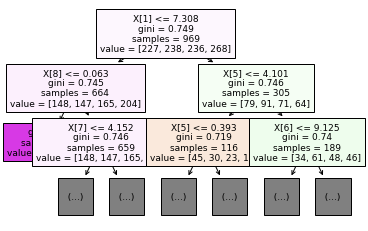

In [224]:
plot_tree(clf,max_depth=2,filled=True,fontsize= 9)  

In [225]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24 22 33 30]
 [20 22 25 27]
 [36 31 20 32]
 [21 19 28 26]]
              precision    recall  f1-score   support

           1       0.24      0.22      0.23       109
           2       0.23      0.23      0.23        94
           3       0.19      0.17      0.18       119
           4       0.23      0.28      0.25        94

    accuracy                           0.22       416
   macro avg       0.22      0.22      0.22       416
weighted avg       0.22      0.22      0.22       416



In [227]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(5,20)}

tree_cv=GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv=10)
